In [ ]:
import numpy as np 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()
#https://raw.githubusercontent.com/datasets/breast-cancer/master/data/breast-cancer.csv
dp = df.drop(['species'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(dp)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [ ]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
values, vectors = np.linalg.eig(cov_matrix)
values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
vectors[:5]

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999999 
 [0.7277045209380132, 0.2303052326768066, 0.03683831957627382, 0.005151926808906328]


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
y=df['species']
res['Y'] = y
res.head()


,PC1,PC2,Y
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


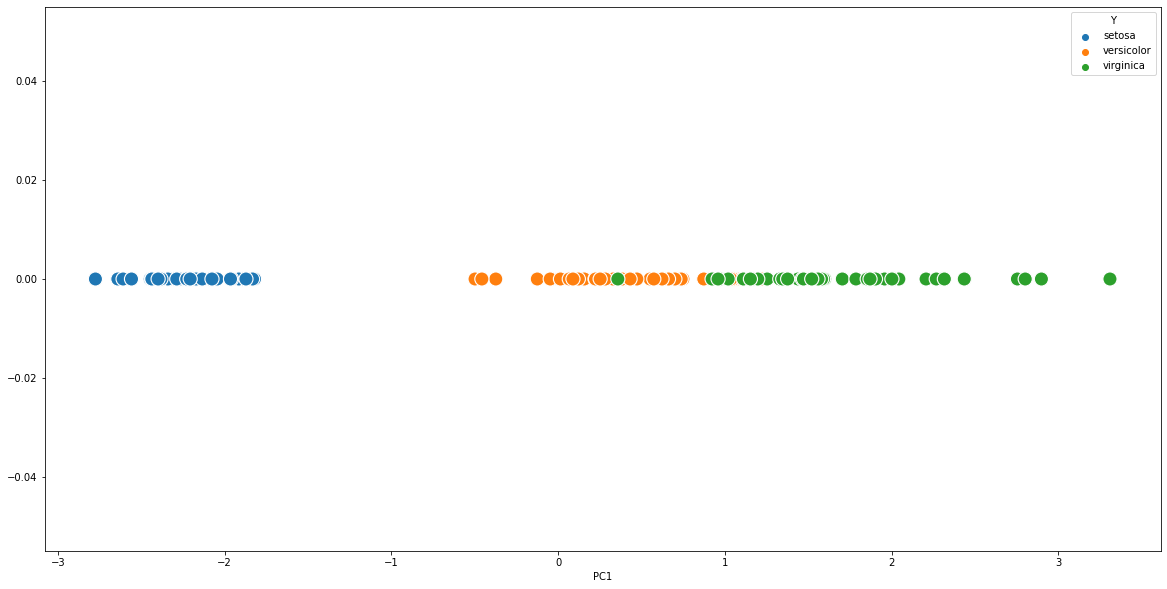

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


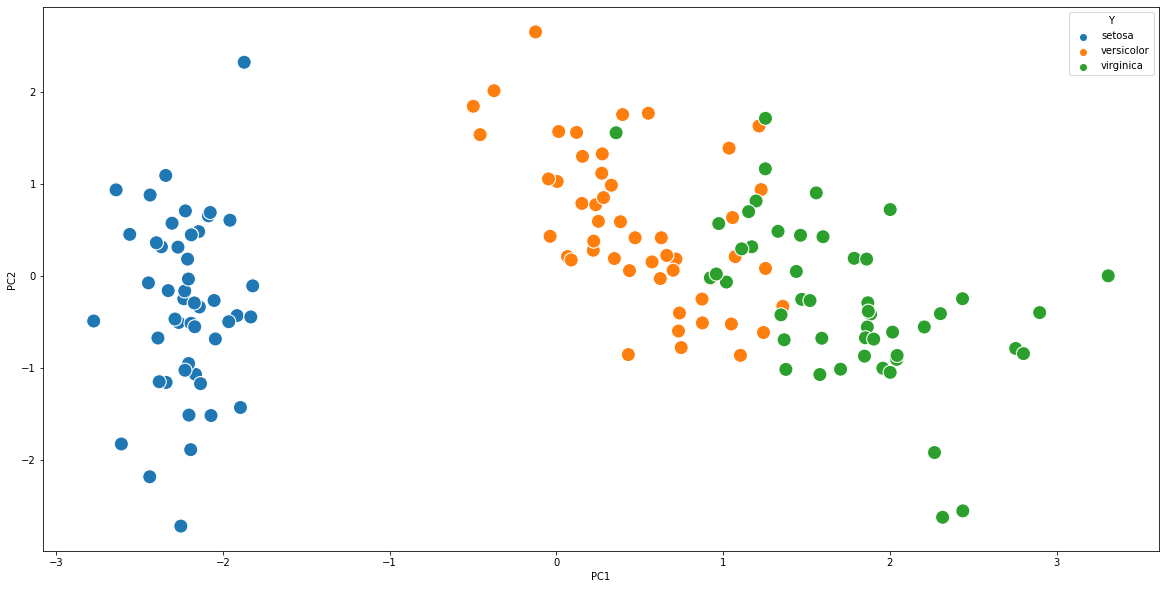

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=200)

In [ ]:
import numpy as np 
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')

#https://raw.githubusercontent.com/datasets/breast-cancer/master/data/breast-cancer.csv
dp = df.drop(['sales','salary'],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(dp)
X_scaled[:5]

array([[-0.93649469, -1.08727529, -1.46286291, -0.88203988, -0.34123516,
        -0.41116529,  1.788917  , -0.14741182],
       [ 0.75281433,  0.84070693,  0.97111292,  1.22042276,  1.71343614,
        -0.41116529,  1.788917  , -0.14741182],
       [-2.02247906,  0.95755433,  2.59376348,  1.4206573 ,  0.34365527,
        -0.41116529,  1.788917  , -0.14741182],
       [ 0.43104118,  0.89913063,  0.97111292,  0.43950807,  1.02854571,
        -0.41116529,  1.788917  , -0.14741182],
       [-0.97671633, -1.14569899, -1.46286291, -0.84199297, -0.34123516,
        -0.41116529,  1.788917  , -0.14741182]])

In [ ]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115, -0.38840088,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476,  0.00656756, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086,  0.02378877, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356,  0.07129193, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.14483183,  0.06743742]])

In [ ]:
values, vectors = np.linalg.eig(cov_matrix)
values

array([1.86103997, 1.46419116, 0.47748369, 1.06065738, 0.95604748,
       0.84555567, 0.62652988, 0.70902817])

In [ ]:
vectors

array([[-0.18956186, -0.60825815,  0.51043559,  0.14578963, -0.2534991 ,
        -0.32268329, -0.2910217 ,  0.2433296 ],
       [ 0.46363715, -0.31222881, -0.27367838,  0.15715943, -0.10307248,
        -0.06471173,  0.54777287,  0.52257837],
       [ 0.55704703, -0.12254292,  0.58883958,  0.0129521 ,  0.09858338,
         0.1887942 ,  0.24157676, -0.47335058],
       [ 0.52559587, -0.17853674, -0.30588994,  0.11339814,  0.0120681 ,
         0.25349244, -0.72147388,  0.02274205],
       [ 0.33395132,  0.11709262, -0.11038416, -0.44415687, -0.04569912,
        -0.79303045, -0.09314767, -0.16013636],
       [-0.06443923, -0.28140442,  0.07016424, -0.42577604,  0.81315664,
         0.06549289, -0.02938544,  0.25312908],
       [ 0.2163394 ,  0.61631274,  0.45356155,  0.01069646,  0.00816191,
         0.01364792, -0.16219105,  0.58392171],
       [-0.00870881, -0.11358933,  0.03780465, -0.74989628, -0.50186771,
         0.39801173,  0.02283486,  0.11154387]])

In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999998 
 [0.23261448621748346, 0.18301169223869543, 0.05968148156919881, 0.13257333293239462, 0.11949796799480347, 0.10568741239349277, 0.07831101384350271, 0.08862261281042855]


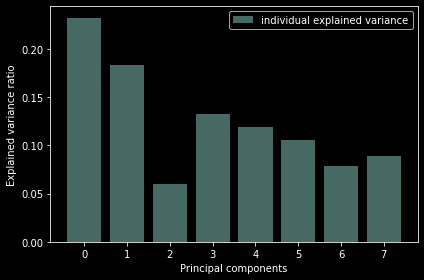

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), explained_variances, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
y=df['salary']
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-1.304221,2.440874,low
1,2.416479,0.378320,medium
2,3.548439,1.634946,medium
3,1.865397,0.615025,low
4,-1.302636,2.476430,low


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


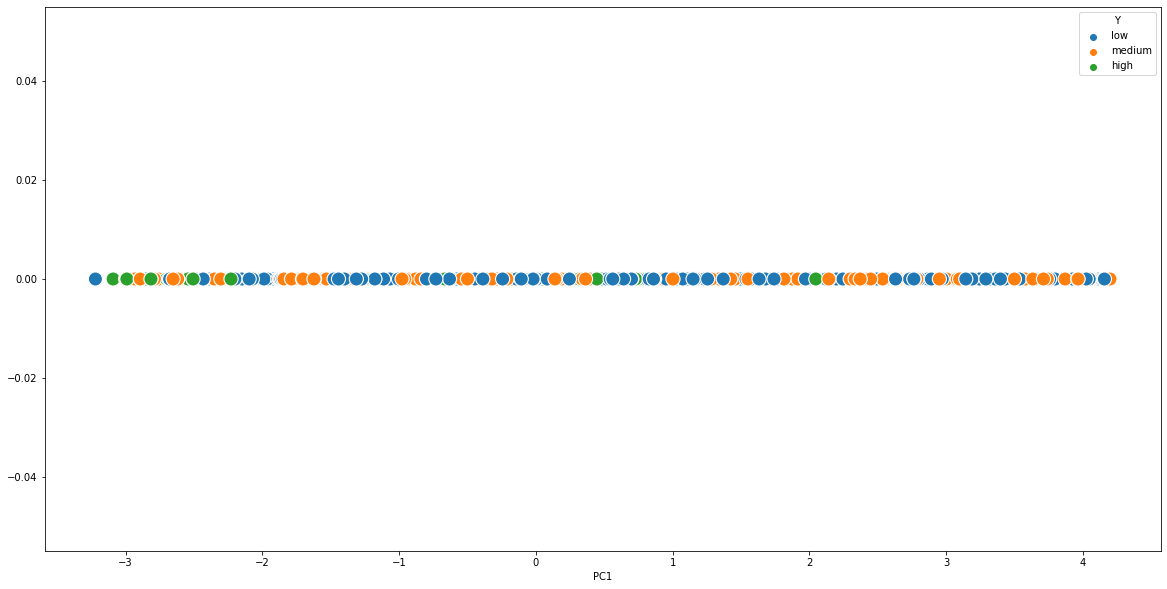

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


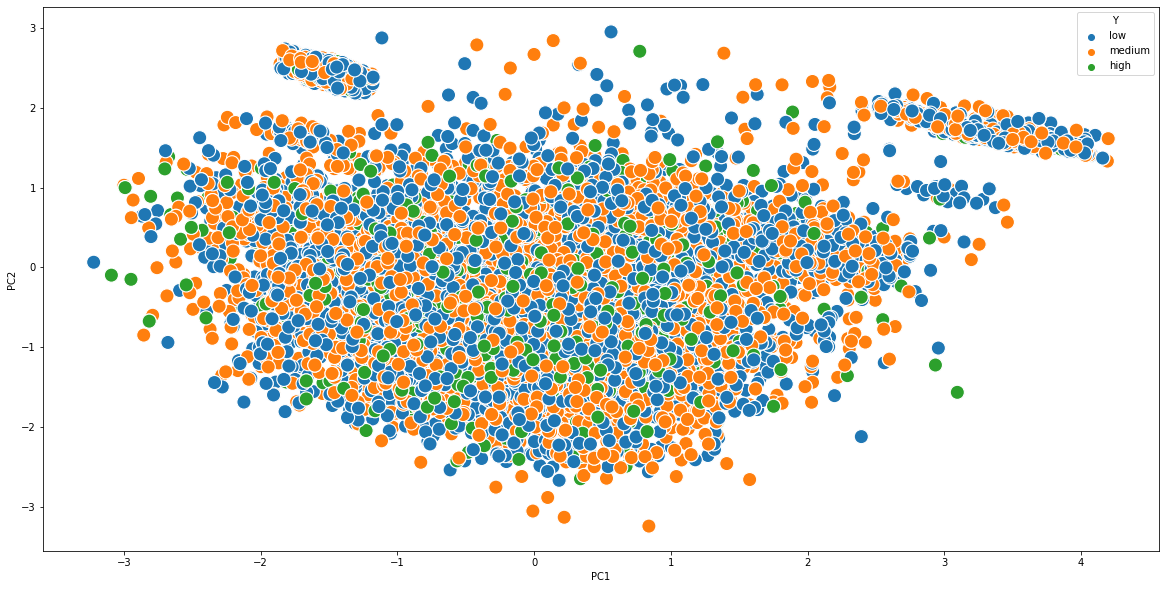

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=200)

In [ ]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])